<a href="https://colab.research.google.com/github/gahz8212/python/blob/master/%ED%95%9C%EA%B5%AD%EC%95%84%ED%8C%8C%ED%8A%B8%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

In [96]:
df=pd.read_csv('/content/drive/MyDrive/csv/korea_apartment_sample.csv')
df

,지역코드,거래연도,거래월,전용면적,층,건물연식,세대수,지하철거리_km,지역소득_백만원,학군점수,거래금액_만원
0,1,2020,5,129.193131,31,2,486,2.473376,6.098772,1.067025,76628
1,4,2015,3,120.466961,15,3,830,2.563601,10.264941,3.716797,89874
2,3,2023,3,49.906979,9,24,1606,2.407747,8.197957,1.306273,53557
3,2,2015,1,37.073566,23,37,1476,3.177218,12.291632,2.683045,46731
4,0,2019,12,132.847062,19,14,1126,0.453609,13.231019,3.406729,81917
...,...,...,...,...,...,...,...,...,...,...,...
495,1,2022,9,70.239909,9,38,1833,1.933101,9.917669,2.406169,49232
496,2,2021,7,93.377342,20,0,1320,3.312420,12.142603,3.441510,72429
497,0,2022,7,44.931719,1,16,716,1.734813,12.378068,1.096441,40979
498,4,2020,11,47.528196,8,40,595,1.953776,6.309089,1.465836,50275


In [97]:
X=df.drop('거래금액_만원',axis=1)
y=df['거래금액_만원']
X.head()


,지역코드,거래연도,거래월,전용면적,층,건물연식,세대수,지하철거리_km,지역소득_백만원,학군점수
0,1,2020,5,129.193131,31,2,486,2.473376,6.098772,1.067025
1,4,2015,3,120.466961,15,3,830,2.563601,10.264941,3.716797
2,3,2023,3,49.906979,9,24,1606,2.407747,8.197957,1.306273
3,2,2015,1,37.073566,23,37,1476,3.177218,12.291632,2.683045
4,0,2019,12,132.847062,19,14,1126,0.453609,13.231019,3.406729


In [98]:
y.head()

,거래금액_만원
0,76628
1,89874
2,53557
3,46731
4,81917


In [99]:
df.dtypes

,0
지역코드,int64
거래연도,int64
거래월,int64
전용면적,float64
층,int64
건물연식,int64
세대수,int64
지하철거리_km,float64
지역소득_백만원,float64
학군점수,float64


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지역코드      500 non-null    int64  
 1   거래연도      500 non-null    int64  
 2   거래월       500 non-null    int64  
 3   전용면적      500 non-null    float64
 4   층         500 non-null    int64  
 5   건물연식      500 non-null    int64  
 6   세대수       500 non-null    int64  
 7   지하철거리_km  500 non-null    float64
 8   지역소득_백만원  500 non-null    float64
 9   학군점수      500 non-null    float64
 10  거래금액_만원   500 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 43.1 KB


In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [102]:
model2 = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)
model2.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 10
[LightGBM] [Info] Start training from score 65260.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(learning_rate=0.05, n_estimators=500, random_state=42)

In [105]:

model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression()

In [107]:

y_pred=model.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3 = model3.predict(X_test)

In [108]:
r2_1=r2_score(y_test,y_pred)
r2_2=r2_score(y_test,y_pred2)
r2_3=r2_score(y_test,y_pred3)


In [109]:
print('랜덤포레스트_r2;',r2_1)
print('라이트gbm_r2;',r2_2)
print('리니어_r2;',r2_3 )

랜덤포레스트_r2; 0.8676693412855635
라이트gbm_r2; 0.8961431606541058
리니어_r2; 0.9141322336831011


In [110]:
print('랜덤포레스트_mae;',mean_absolute_error(y_test,y_pred))
print('라이트gbm_mae;',mean_absolute_error(y_test,y_pred2))
print('리니어_mae;',mean_absolute_error(y_test,y_pred3))

랜덤포레스트_mae; 5116.940199999999
라이트gbm_mae; 4424.9727663720505
리니어_mae; 4091.4383303278114


In [111]:
print('랜덤포레스트_rmse;',np.sqrt(mean_squared_error(y_test,y_pred)))
print('라이트gbm_rmse;',np.sqrt(mean_squared_error(y_test,y_pred2)))
print('리니어_rmse;',np.sqrt(mean_squared_error(y_test,y_pred3)))

랜덤포레스트_rmse; 6181.69138285421
라이트gbm_rmse; 5476.39333270323
리니어_rmse; 4979.5737064526775


In [112]:
price1=model.predict([[1,2025,11,87.366605,10,15,500,1,2,3]])

In [113]:
price2=model2.predict([[1,2025,11,87.366605,10,15,500,1,2,3]])
price1,price2

(array([61369.79]), array([60731.6341193]))

In [114]:
price3=model.predict([[1,2025,11,87.366605,10,15,500,1,2,3]])
price3

array([61369.79])

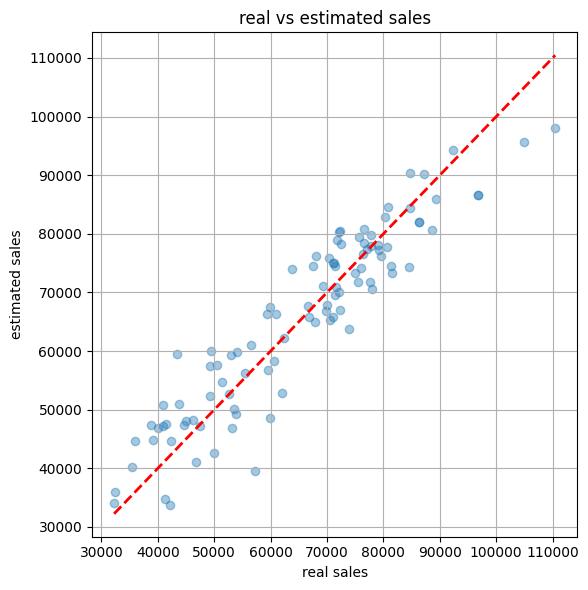

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

# 산점도: x축 실제, y축 예측
plt.scatter(y_test, y_pred, alpha=0.4)

# y = x 기준선 (완벽 예측선)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.xlabel("real sales")
plt.ylabel("estimated sales")
plt.title("real vs estimated sales")
plt.grid(True)
plt.tight_layout()
plt.show()